In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
samples = 'CACO2  COLON_MURINO_XenoCells  SNU1040_S19  SNU1040_XenoCells  SNU1047_S8  SW1463  SW1463_XenoCells'.split()

In [31]:
# load the outputs of original implementation
orig = pd.DataFrame({'Gene': []}).set_index('Gene')

for sample in samples:
    o = pd.read_table(f'orig/{sample}')
    o.columns = [ 'Gene', sample ]
    o = o.set_index('Gene')
    orig = pd.concat([orig,o],axis=1)

In [32]:
# the same samples, our galaxy implementation
galaxy = pd.DataFrame({'Gene': []}).set_index('Gene')

for sample in samples:
    g = pd.read_table(f'galaxy/{sample}')
    g = g.drop(['Chr','Start','End','Strand','Length'],axis=1)
    g.columns = [ 'Gene', sample ]
    g = g.set_index('Gene')
    galaxy = pd.concat([galaxy,g],axis=1)


#g = np.log2(g[g['count'] > 0])

In [36]:
# align to common subset of genes
galaxy = galaxy[galaxy.index.isin(orig.index)]
orig = orig[orig.index.isin(galaxy.index)]

In [39]:
# logtransform
galaxy = np.log2(galaxy)
orig = np.log2(orig)

/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


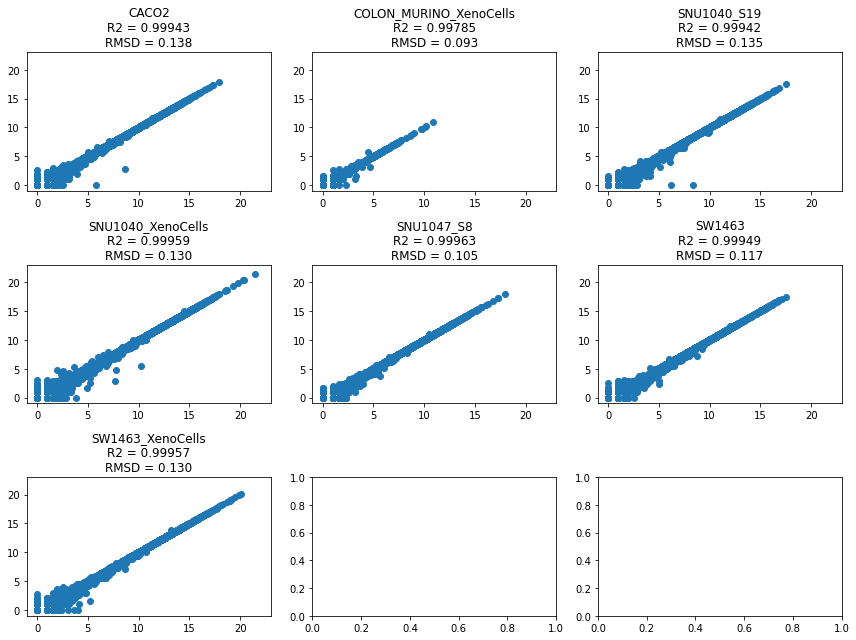

In [74]:
# scatterplots and elementary statistics
fig = plt.figure(figsize=(12,9))
axes = fig.subplots(3,3)
lim = [-1,23]
stat = pd.DataFrame({'sample': samples, 'R2' : [None]*len(samples), 'rmsd' : [None]*len(samples)}).set_index('sample')

i=0
for r in axes:
    for p in r:
        sample=samples[i]
        c = pd.concat([orig[sample],galaxy[sample]],axis=1)
        c.columns = ['orig','galaxy']
        c[c == -np.inf] = None
        p.scatter(c['orig'],c['galaxy'])
        stat.R2[sample] = c.corr()['orig']['galaxy']
        stat.rmsd[sample] = np.sqrt(((c.orig - c.galaxy) ** 2).mean())
        p.set_title(f"{sample}\nR2 = {stat.R2[sample]:.5f}\nRMSD = {stat.rmsd[sample]:.3f}")
        p.set_xlim(lim)
        p.set_ylim(lim)
        i += 1
        if i == len(samples): break
        
fig.tight_layout()    
fig.savefig('scatter.pdf')
fig.show()

In [75]:
stat

,R2,rmsd
sample,,
CACO2,0.999425,0.137906
COLON_MURINO_XenoCells,0.997851,0.092548
SNU1040_S19,0.999424,0.134733
SNU1040_XenoCells,0.999587,0.129761
SNU1047_S8,0.999635,0.104739
SW1463,0.999492,0.116894
SW1463_XenoCells,0.999566,0.129984
